Loading tensorflow module and check its version

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

print("tensorflow version:", tf.__version__)


tensorflow version: 2.0.0


# Loading MNIST dataset

In [2]:
mnist = tf.keras.datasets.mnist # 28x29 (multi-dimension) images of hand-written digits 0 - 9

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data() # load mnist data and distribute to "training" and "test" set

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1) # normalize the data (0~1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # reducing the dimension of the data sets
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # no of units (no. of nerons), rectified linear (default function)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output layer. still in dense layer, probability distribution

model.compile(optimizer='adam',  # optimization method
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']) 


model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 22s 365us/sample - loss: 0.2636 - accuracy: 0.9226
Epoch 2/3
60000/60000 [==============================] - 31s 511us/sample - loss: 0.1060 - accuracy: 0.9671
Epoch 3/3
60000/60000 [==============================] - 26s 432us/sample - loss: 0.0722 - accuracy: 0.9773


In [5]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.10361382581219077 0.9677


In [6]:
model.save('epic_num_reader.model') # save the model

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [7]:
new_model = tf.keras.models.load_model('epic_num_reader.model') # laod the saved model as new model

In [8]:
predictions = new_model.predict([x_test]) # predict

In [9]:
print(predictions) # probability distributions

[[6.83505164e-08 4.77431144e-08 8.45923660e-06 ... 9.99952793e-01
  1.99676031e-09 4.87660792e-08]
 [1.41762584e-08 5.62940295e-06 9.99992371e-01 ... 1.00440345e-09
  8.03812483e-08 9.91282126e-11]
 [1.16928106e-07 9.99673486e-01 1.47679530e-05 ... 5.90689961e-05
  8.80324369e-05 3.44889600e-07]
 ...
 [4.75540034e-08 5.52350173e-07 4.58571719e-07 ... 1.31685674e-05
  1.00046946e-05 9.50787289e-05]
 [1.02997255e-05 2.11248471e-06 9.38130370e-07 ... 7.10070026e-07
  1.76010537e-04 4.05744816e-09]
 [3.70967723e-06 6.21237550e-09 1.02713884e-05 ... 2.30228392e-10
  3.38122163e-06 1.70221952e-08]]


In [10]:
import numpy as np

In [12]:
print(np.argmax(predictions[0])) # show x_test 0th index

7


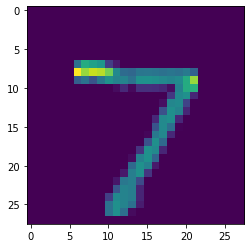

In [13]:
plt.imshow(x_test[0])
plt.show()

In [ ]:
#print(x_train[0]) # shows the tensor

In [ ]:
#plt.imshow(x_train[0],cmap=plt.cm.binary)
#plt.show()